In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Airbnb_data.csv')

In [5]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

(None,
          id  log_price property_type        room_type  \
 0   6901257   5.010635     Apartment  Entire home/apt   
 1   6304928   5.129899     Apartment  Entire home/apt   
 2   7919400   4.976734     Apartment  Entire home/apt   
 3  13418779   6.620073         House  Entire home/apt   
 4   3808709   4.744932     Apartment  Entire home/apt   
 
                                            amenities  accommodates  bathrooms  \
 0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
 1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
 2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
 3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
 4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   
 
    bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
 0  Real Bed              strict          True  ...  40.696524  -73.991

In [9]:
drop_col = ['id','name','description','thumbnail_url','last_review','first_review','host_since','amenities','host_response_rate','zipcode','neighbourhood']
df.drop(columns=drop_col, inplace=True)

In [11]:
num_col = ['accommodates','bathrooms','bedrooms','beds','latitude','longitude','number_of_reviews','review_scores_rating']
cat_col = ['property_type','room_type','bed_type','cancellation_policy','city']

In [13]:
df[num_col] = df[num_col].fillna(df[num_col].median())
df[cat_col] = df[cat_col].fillna(df[cat_col].mode().iloc[0])

In [25]:
df = pd.get_dummies(df, columns=cat_col, drop_first=True)

In [27]:
bool_col = ['cleaning_fee','instant_bookable','host_has_profile_pic','host_identity_verified']
for col in bool_col:
    df[col] = df[col].astype(str).map({'t':1,'f':0,'True':1,'False':0}).fillna(0).astype(int)

In [29]:
X = df.drop(columns=['log_price'])
y = df['log_price']

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [33]:
rfm = RandomForestRegressor(n_estimators=100 , random_state=42)
rfm.fit(X_train , y_train)

RandomForestRegressor(random_state=42)

In [37]:
y_pred = rfm.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test , y_pred))
r2 = r2_score(y_test , y_pred)

In [41]:
mae , rmse , r2


(0.28851857204991094, 0.4024935205253276, 0.6846547263509735)

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_13900\822542991.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10] , palette='viridis')


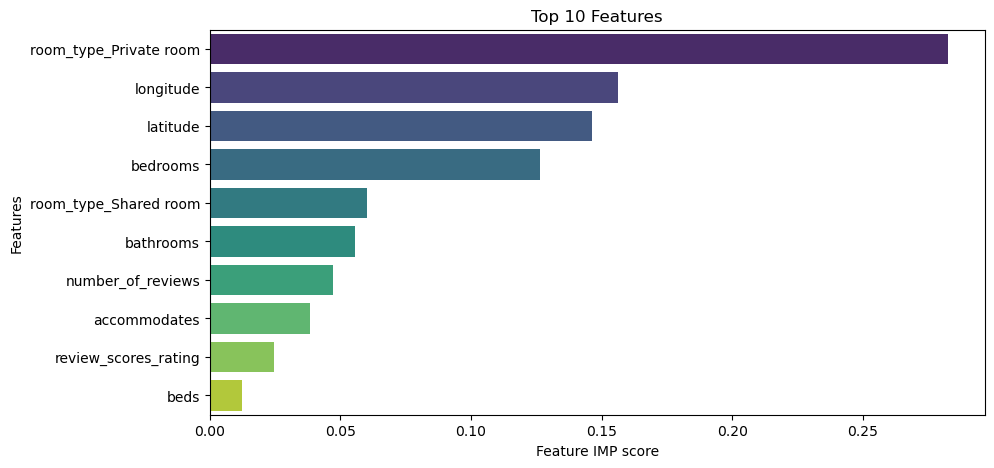

In [71]:
# Following graphs are helps to analyse how our model works

# Feature Importance Analysis
feature_importance = pd.Series(rfm.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10] , palette='viridis')
plt.title('Top 10 Features')
plt.xlabel('Feature IMP score')
plt.ylabel('Features')
plt.show()

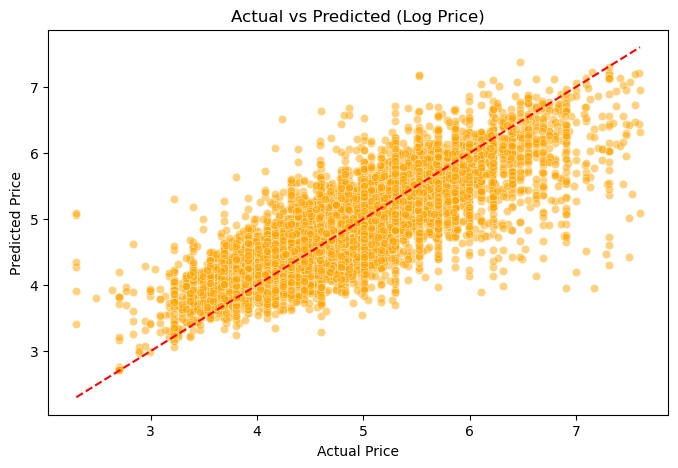

In [79]:
# Actual vs Predicted Prices
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='orange')
plt.plot([min(y_test) , max(y_test)] , [min(y_test),max(y_test)] , color='red' , linestyle='--')
plt.title('Actual vs Predicted (Log Price)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()